# Temporal-Difference Methods (Q-learning)

---

### Part 0: Explore CliffWalkingEnv

In [78]:
import sys
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

from plot_utils import plot_values

Use the code cell below to create an instance of the [CliffWalking](https://github.com/openai/gym/blob/master/gym/envs/toy_text/cliffwalking.py) environment.

In [79]:
env = gym.make('CliffWalking-v0')

The agent moves through a $4\times 12$ gridworld, with states numbered as follows:
```
[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
 [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
 [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]]
```
At the start of any episode, state `36` is the initial state.  State `47` is the only terminal state, and the cliff corresponds to states `37` through `46`.

The agent has 4 potential actions:
```
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3
```

Thus, $\mathcal{S}^+=\{0, 1, \ldots, 47\}$, and $\mathcal{A} =\{0, 1, 2, 3\}$.  

In [80]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(48)


In this mini-project, we will build towards finding the optimal policy for the CliffWalking environment.  The optimal state-value function is visualized below.  Please take the time now to make sure that you understand _why_ this is the optimal state-value function.

_**Note**: You can safely ignore the values of the cliff "states" as these are not true states from which the agent can make decisions.  For the cliff "states", the state-value function is not well-defined._

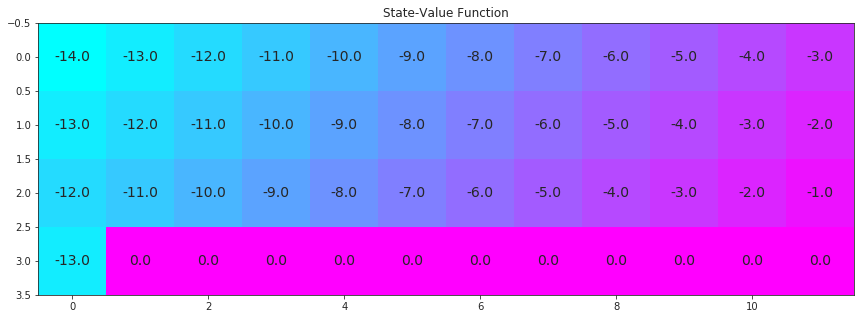

In [81]:
# define the optimal state-value function
V_opt = np.zeros((4,12))
V_opt[0:13][0] = -np.arange(3, 15)[::-1]
V_opt[0:13][1] = -np.arange(3, 15)[::-1] + 1
V_opt[0:13][2] = -np.arange(3, 15)[::-1] + 2
V_opt[3][0] = -13

plot_values(V_opt)

### Part 1: TD Control: Q-learning

In this section, you will write your own implementation of the Sarsa control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a array of shape (env.nS, env.nA) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

In [82]:
def action_select(s, Q, EPSILON):
    if random.random() < EPSILON:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[s, :])
    return action

In [83]:
def sarsa(env, num_episodes, alpha, gamma=1.0, plot_every=100):
    Q = np.zeros((env.nS, env.nA))
    eps_rew = []     # for keeping track of episode rewards
    avg_scores = []   # average scores over every plot_every episodes
    
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()   
        rewards = 0
        obs = env.reset()
        EPSILON = 1./i_episode
        done = False
        while not done:
            action = action_select(obs, Q, EPSILON)
#             print(action)
            next_state, reward, done, _ = env.step(action)
            rewards += reward
            Q[obs, action] = (1 - alpha) * Q[obs, action] + alpha * (reward + gamma * np.max(Q[next_state]))
            obs = next_state
            if done:
                eps_rew.append(rewards)
        if (i_episode % plot_every == 0):
            avg_scores.append(np.mean(np.array(eps_rew)))

#         plot performance
    plt.plot(np.linspace(0,num_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_every)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % plot_every), np.max(avg_scores))    
    return Q

Episode 5000/5000

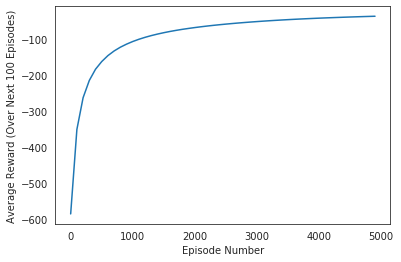

Best Average Reward over 100 Episodes:  -37.3386


In [84]:
Q_sarsa = sarsa(env, 5000, .01)


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 1.  3.  0.  1.  1.  3.  1.  1.  0.  1.  2.  0.]
 [ 1.  1.  1.  3.  1.  0.  2.  1.  1.  2.  2.  2.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.]
 [ 0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]


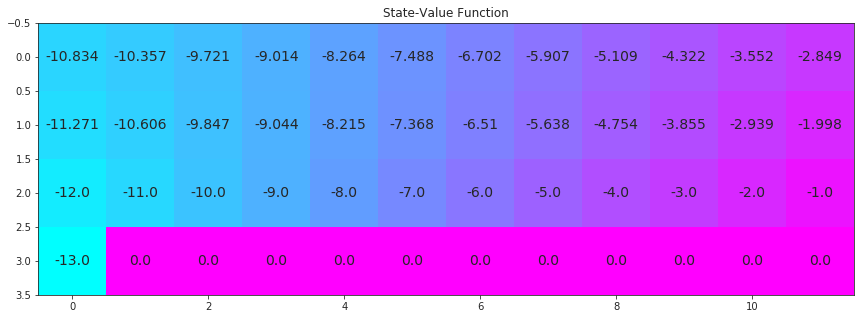

In [85]:
# obtain the estimated optimal policy and corresponding action-value function
state_values = np.zeros(Q_sarsa.shape[0])
policy = np.zeros(Q_sarsa.shape[0])
for i in range(Q_sarsa.shape[0]):
    state_values[i] = np.max(Q_sarsa[i])
    if np.max(Q_sarsa[i]):
        policy[i] = np.argmax(Q_sarsa[i])
    else:
        policy[i] = -1.
Values = state_values.reshape(4, 12)
policy = policy.reshape(4, 12)

# print the estimated optimal policy
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy)

# plot the estimated optimal state-value function
plot_values(Values)